# Getting and manipulating data

A small playground for testing my ability to obtain the data in python for future work 

In [1]:
import os

# Set up the path to the data.
data_path = '/vol/biomedic3/bglocker/nnUNet'

if os.path.exists(data_path):
    print("The path exists.")
    print('The relevant contents are...')
    for x in sorted(os.listdir(data_path)): 
        if 'nnUNet' in x: print(f'   {x}')
else:
    print("The path does not exist.")

The path exists.
The relevant contents are...
   nnUNet_preprocessed
   nnUNet_raw
   nnUNet_results
   nnUNet_testing


In [2]:
# Each anatomical structure has a unique identifier.
id_anorectum = 'Dataset001_Anorectum'
id_bladder = 'Dataset002_Bladder'
id_ctvn = 'Dataset003_CTVn'
id_ctvp = 'Dataset004_CTVp'
id_parametrium = 'Dataset005_Parametrium'

In [3]:
import json

file_path = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'dataset.json')

with open(file_path, 'r') as file:
    data = json.load(file)

print(data['numTraining'])
print(data['labels'])

100
{'background': 0, 'anorectum': 1}


### Getting raw data

In [4]:
import random
import SimpleITK as sitk

random_file_number = random.randint(0, data['numTraining'] - 1)

random_file_number = str(random_file_number).zfill(3)

random_example_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_{random_file_number}_0000{data["file_ending"]}')

random_example_y = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'labelsTr',f'zzAMLART_{random_file_number}{data["file_ending"]}')

In [5]:
# Read the file using SimpleITK
image_x = sitk.ReadImage(random_example_x)
array_x = sitk.GetArrayFromImage(image_x)

In [6]:
# Read the file using SimpleITK
image_y = sitk.ReadImage(random_example_y)
array_Y = sitk.GetArrayFromImage(image_y)

### Analyse metadata statistics

In [7]:
bitpix = []
image_size = []
pix_dim = []
xyzt_units = []

# Without reading in the actual pixel values, read in the metadata of each image
for i in range(1, data["numTraining"] + 1):
    file_number = str(i).zfill(3)
    file_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_{file_number}_0000{data["file_ending"]}')

    reader = sitk.ImageFileReader()

    reader.SetFileName(file_x)
    reader.LoadPrivateTagsOn()

    reader.ReadImageInformation()

    # for k in reader.GetMetaDataKeys():
    #     v = reader.GetMetaData(k)
    #     print(f'({k}) = = "{v}"')

    bitpix.append(reader.GetMetaData('bitpix'))
    image_size.append(reader.GetSize())
    pix_dim.append(image_x.GetSpacing())
    xyzt_units.append(reader.GetMetaData('xyzt_units'))

print(bitpix)
print(image_size)
print(pix_dim)
print(xyzt_units)

['16', '16', '16', '16', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '32', '32', '32', '32', '32', '16', '16', '32', '32', '32', '32', '32', '32', '32', '16', '16', '16', '16', '16', '16', '16', '32', '32', '16', '32', '32', '32', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '32', '16', '16', '16', '32', '32', '32', '32', '32']
[(512, 512, 297), (512, 512, 267), (512, 512, 225), (512, 512, 219), (512, 512, 180), (512, 512, 248), (512, 512, 189), (512, 512, 183), (512, 512, 196), (512, 512, 174), (512, 512, 181), (512, 512, 191), (512, 512, 173), (512, 512, 187), (512, 512, 141), (512, 512, 153), (512, 512, 198), (512, 512, 169), (512, 512, 182), (512, 512, 238), (512, 512, 217), (512, 512, 180), (512, 512, 162), (512, 5

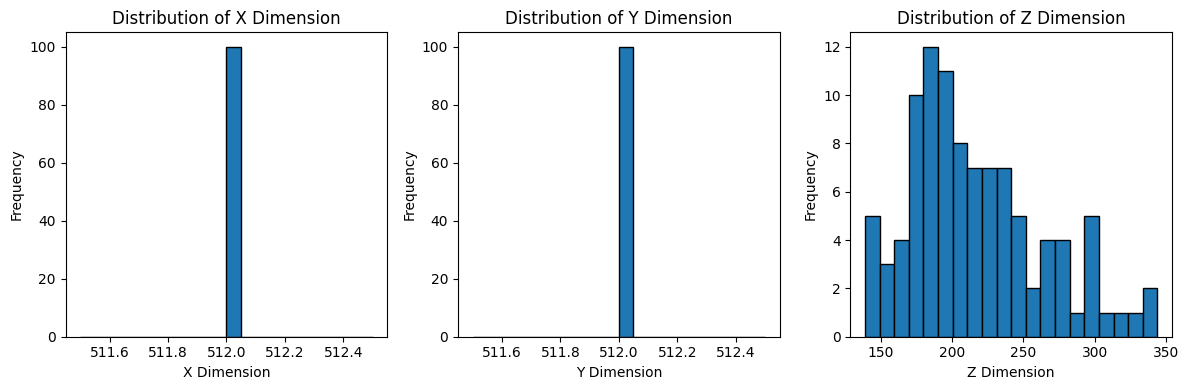

In [8]:
import matplotlib.pyplot as plt

# Extract the dimensions from the image_size list
x_dim = [size[0] for size in image_size]
y_dim = [size[1] for size in image_size]
z_dim = [size[2] for size in image_size]

# Plot the histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(x_dim, bins=20, edgecolor='black')
plt.xlabel('X Dimension')
plt.ylabel('Frequency')
plt.title('Distribution of X Dimension')

plt.subplot(1, 3, 2)
plt.hist(y_dim, bins=20, edgecolor='black')
plt.xlabel('Y Dimension')
plt.ylabel('Frequency')
plt.title('Distribution of Y Dimension')

plt.subplot(1, 3, 3)
plt.hist(z_dim, bins=20, edgecolor='black')
plt.xlabel('Z Dimension')
plt.ylabel('Frequency')
plt.title('Distribution of Z Dimension')

plt.tight_layout()
plt.show()


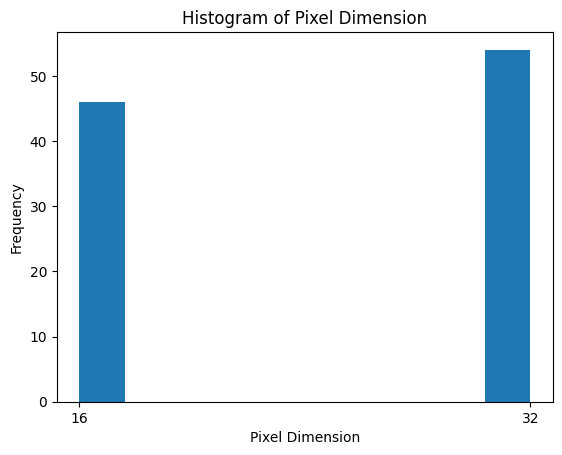

In [9]:
plt.hist(bitpix)
plt.xlabel('Pixel Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Dimension')
plt.show()


In [10]:
import numpy as np
# Extract the dimensions from the image_size list
x_dim = [size[0] for size in pix_dim]
y_dim = [size[1] for size in pix_dim]
z_dim = [size[2] for size in pix_dim]

# Calculate the average
x_dim_avg = np.mean(x_dim)
y_dim_avg = np.mean(y_dim)
z_dim_avg = np.mean(z_dim)

# Print the averages
print("By observation we see that these lists contain the same value, this value is")
print("Average for x_dim:", x_dim_avg)
print("Average for y_dim:", y_dim_avg)
print("Average for z_dim:", z_dim_avg)

By observation we see that these lists contain the same value, this value is
Average for x_dim: 0.9765625
Average for y_dim: 0.9765625
Average for z_dim: 2.0


### Pixel intensity distribution

In [11]:
import random
import SimpleITK as sitk

random_file_number = str(random.randint(0, data['numTraining'] - 1)).zfill(3)

random_example_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_{random_file_number}_0000{data["file_ending"]}')

In [12]:
# Read the file using SimpleITK
image_x = sitk.ReadImage(random_example_x)
array_x = sitk.GetArrayFromImage(image_x)

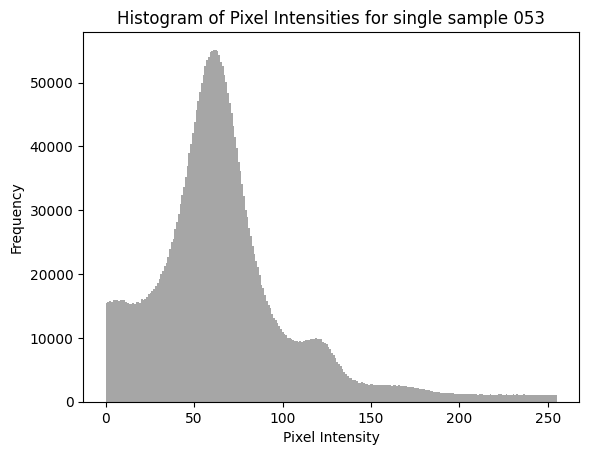

In [13]:
import matplotlib.pyplot as plt

plt.hist(array_x.flatten(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Pixel Intensities for single sample {random_file_number}')
plt.show()


In [14]:
import random
# Assuming you have a list called 'my_list'
random_elements = random.sample([i for i in range(1, data['numTraining'] - 1)], k=10)
pixel_values = []

for i in random_elements:
    file_number = str(i).zfill(3)
    file_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_{file_number}_0000{data["file_ending"]}')

    # Read the file using SimpleITK
    image_x = sitk.ReadImage(file_x)
    array_x = sitk.GetArrayFromImage(image_x)

    print(array_x.flatten().shape)
    pixel_values.append(array_x.flatten())

(61603840,)
(57147392,)
(49545216,)
(58982400,)
(77856768,)
(56885248,)
(36438016,)
(70778880,)
(53215232,)
(51642368,)


In [15]:
# cannot set to numpy array due to inhomogenous size
# import numpy as np
# pixel_values_array = np.array(pixel_values)

In [16]:
import numpy as np
max_pix = 0
min_pix = 0
for i in pixel_values:
    max_pix = max(max_pix, np.max(i))
    min_pix = min(min_pix, np.min(i))

print(max_pix)
print(min_pix)
buckets = (max_pix - min_pix) // 50
print(f'buckets: {buckets}')

18254
-1000
buckets: 385


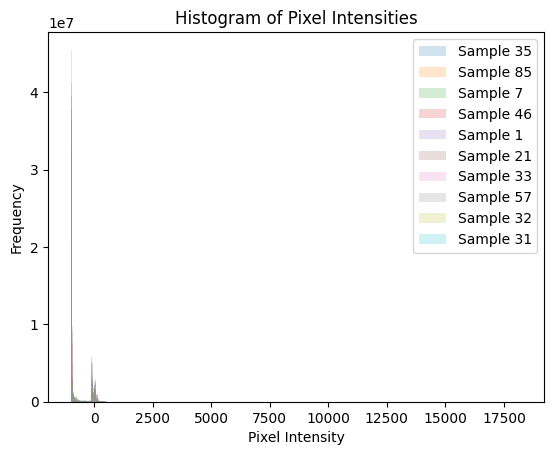

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
for index in range(len(pixel_values)):
    ax.hist(pixel_values[index], bins=buckets, range=(min_pix, max_pix), alpha=0.2, label=f'Sample {random_elements[index]}', color=f'C{index}')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities')

# Add legend
ax.legend()

# Show the plot
plt.show()

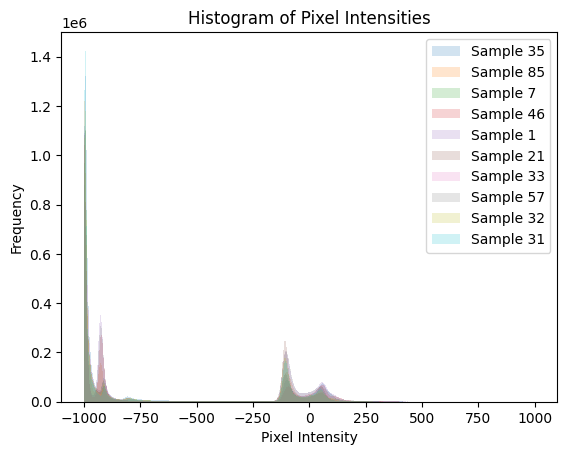

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
for index in range(len(pixel_values)):
    ax.hist(pixel_values[index], bins=2000, range=(-1000, 1000), alpha=0.2, label=f'Sample {random_elements[index]}', color=f'C{index}')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities')

# Add legend
ax.legend()

ax.set_ylim(0, 0.15e7)

# # From observations, we conclude that there is a bimodal distribution for the organ tissue (excluding the background value of -1000)
# ax.axvline(x=-100, color='red', linestyle='--')
# ax.axvline(x=60, color='red', linestyle='--')

# Show the plot
plt.show()

### Normalizing the pixel values

In [19]:
# Hone in on example 024 for consistency

import SimpleITK as sitk

random_example_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_024_0000{data["file_ending"]}')

# Read the file using SimpleITK
image_x = sitk.ReadImage(random_example_x)
array_x = sitk.GetArrayFromImage(image_x)

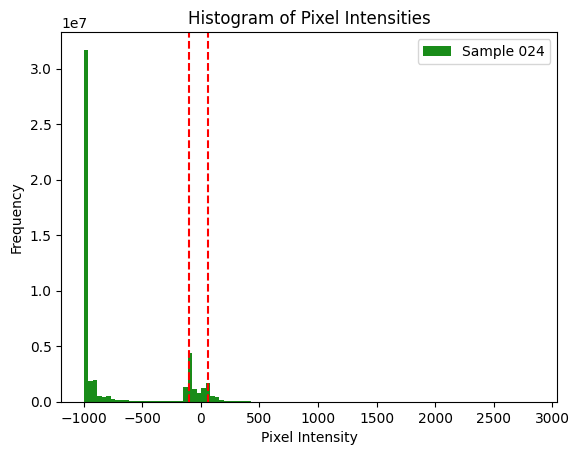

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
ax.hist(array_x.flatten(), bins=100, range=(np.min(array_x), np.max(array_x)), alpha=0.9, label=f'Sample 024', color=f'green')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities')

# Add legend
ax.legend()

# From observations, we conclude that there is a bimodal distribution for the organ tissue (excluding the background value of -1000)
ax.axvline(x=-100, color='red', linestyle='--')
ax.axvline(x=60, color='red', linestyle='--')

# Show the plot
plt.show()

#### Visualising some different types of classess

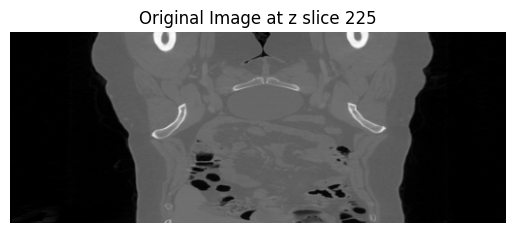

In [41]:
# array_x.shape, image_x.GetSize() # ((194, 512, 512), (512, 512, 194))

import matplotlib.pyplot as plt

# Select the z slice
z_slice = 225

# Plot the image
plt.imshow(array_x[:, z_slice, :], cmap='gray')
plt.axis('off')
plt.title(f'Original Image at z slice {z_slice}')
plt.show()

In [21]:
bone_range = [300, 2500]
liver_range = [50, 70]
blood_range = [50, 60]
kidneys_range = [20, 40]
muscle_range = [10, 40]
water_range = [0,0]
fat_range = [-100, -80]
air_range = [-1000, -1000]

In [42]:
bone_mask = np.logical_and(array_x[:, z_slice, :] > bone_range[0], array_x[:, z_slice, :] < bone_range[1])
liver_mask = np.logical_and(array_x[:, z_slice, :] > liver_range[0], array_x[:, z_slice, :] < liver_range[1])
blood_mask = np.logical_and(array_x[:, z_slice, :] > blood_range[0], array_x[:, z_slice, :] < blood_range[1])
kidneys_mask = np.logical_and(array_x[:, z_slice, :] > kidneys_range[0], array_x[:, z_slice, :] < kidneys_range[1])
muscle_mask = np.logical_and(array_x[:, z_slice, :] > muscle_range[0], array_x[:, z_slice, :] < muscle_range[1])
water_mask = np.logical_and(array_x[:, z_slice, :] > water_range[0], array_x[:, z_slice, :] < water_range[1])
fat_mask = np.logical_and(array_x[:, z_slice, :] > fat_range[0], array_x[:, z_slice, :] < fat_range[1])
air_mask = np.logical_and(array_x[:, z_slice, :] > air_range[0], array_x[:, z_slice, :] < air_range[1])

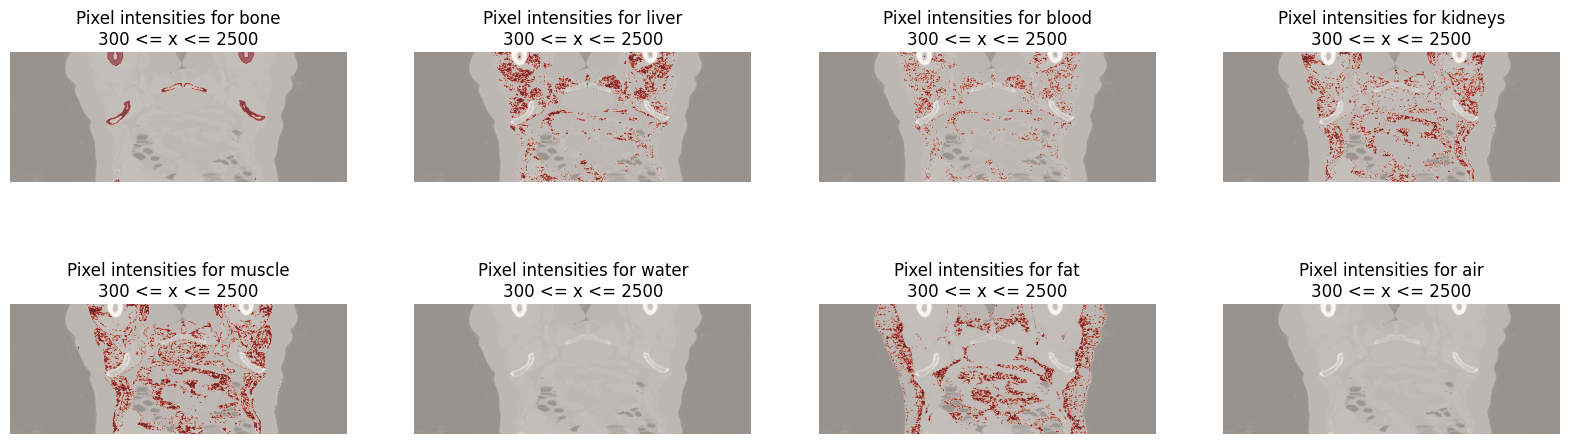

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 6))

for ax, mask, c in zip(axes.flatten(), [bone_mask, liver_mask, blood_mask, kidneys_mask, muscle_mask, water_mask, fat_mask, air_mask], ['bone', 'liver', 'blood', 'kidneys', 'muscle', 'water', 'fat', 'air']):
    ax.imshow(array_x[:, z_slice, :], cmap='gray')
    ax.imshow(mask, cmap='Reds', alpha=0.6)
    ax.axis('off')
    ax.set_title(f'Pixel intensities for {c}\n{bone_range[0]} <= x <= {bone_range[1]}')

plt.show()


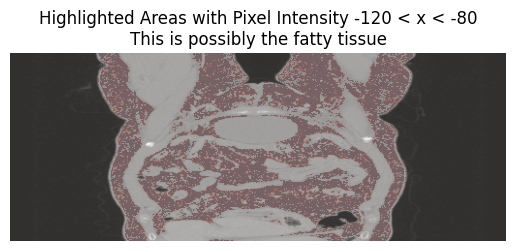

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for areas with pixel intensity -100
mask = np.logical_and(-120 <= array_x[:, 210, :], array_x[:, 210, :] <= -80)

# Plot the image with highlighted areas in red
plt.imshow(array_x[:, 210, :], cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.2)
plt.axis('off')
plt.title('Highlighted Areas with Pixel Intensity -120 < x < -80\nThis is possibly the fatty tissue')
plt.show()


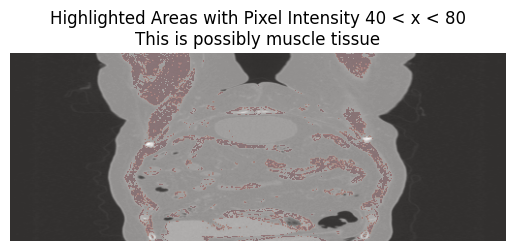

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for areas with pixel intensity -100
mask = np.logical_and(40 <= array_x[:, 210, :], array_x[:, 210, :] <= 80)

# Set non-matching areas to transparent
masked_array = np.ma.masked_where(~mask, mask)

# Plot the image with highlighted areas in red
plt.imshow(array_x[:, 210, :], cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.2)
plt.axis('off')
plt.title('Highlighted Areas with Pixel Intensity 40 < x < 80\nThis is possibly muscle tissue')
plt.show()


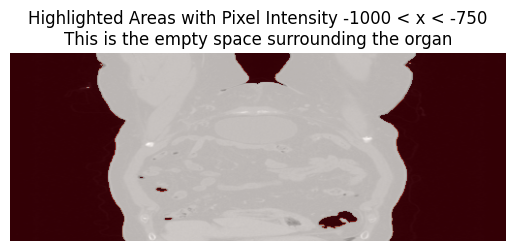

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for areas with pixel intensity -100
mask = np.logical_and(-1000 <= array_x[:, 210, :], array_x[:, 210, :] <= -750)

# Plot the image with highlighted areas in red
plt.imshow(array_x[:, 210, :], cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.axis('off')
plt.title('Highlighted Areas with Pixel Intensity -1000 < x < -750\nThis is the empty space surrounding the organ')
plt.show()


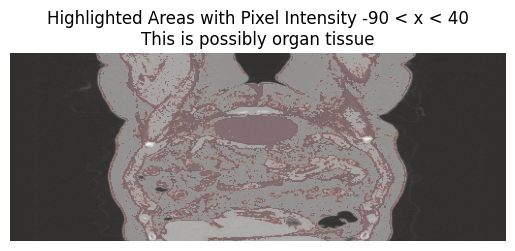

In [25]:
import numpy as np
import matplotlib.pyplot as plt

mask = np.logical_and(-80 <= array_x[:, 210, :], array_x[:, 210, :] <= 40)

# Set non-matching areas to transparent
masked_array = np.ma.masked_where(~mask, mask)

# Plot the image with highlighted areas in red
plt.imshow(array_x[:, 210, :], cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.2)
plt.axis('off')
plt.title('Highlighted Areas with Pixel Intensity -90 < x < 40\nThis is possibly organ tissue')
plt.show()


Normalization ideas taken from https://medium.com/@susanne.schmid/image-normalization-in-medical-imaging-f586c8526bd1

#### Normalization

- ''image intensity range gets transformed into the range from 0–1, which does not affect the image itself.''
- in natural images, pixel values are bounded between 0 and 255, wheras in a CT scan: 

    ''intuitive motivation breaks apart when dealing with medical images in particular MRI because 
    1) image intensity reflects tissue type
    2) image intensity is relative and 
    3) intensity range is not bounded.''

- The voxel intensity refers to specific tissue composition
- Conventional MRI is qualitative which means, that even though the intensity value refers to a specific tissue, a repeated MRI scan will obtain different voxel intensities. However, the absolute intensity does not matter in MRI because MR images benefit from the contrast between the different tissues and not the absolute value. 

##### Min-max normalization

`normalized_value = (original_value - min_value) / (max_value - min_value)`

As mentioned by the article, this technique is not ideal, because since the pixel intensities are unbounded, this technique is very sensitive to outliers. This causes the peaks to be skewed between the organ types it is.

In [14]:
normalized_pixel_values = []

for i in range(len(pixel_values)):
    array = pixel_values[i]

    # Calculate the min and max values
    min_value = np.min(array)
    max_value = np.max(array)

    new_array = (array - min_value) / (max_value - min_value)

    normalized_pixel_values.append(new_array)

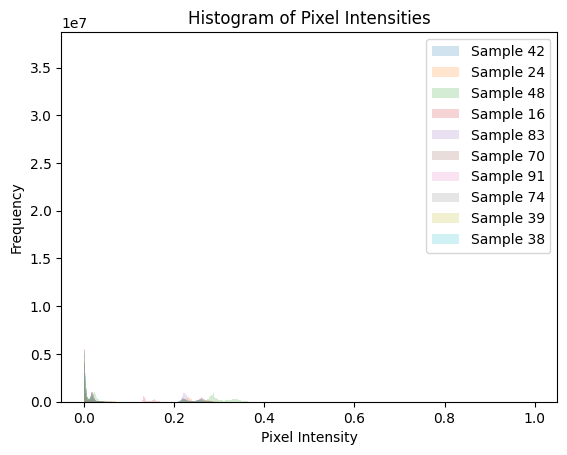

In [15]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
for index in range(len(pixel_values)):
    ax.hist(normalized_pixel_values[index], bins=1000, range=(0, 1), alpha=0.2, label=f'Sample {random_elements[index]}', color=f'C{index}')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities')

# Add legend
ax.legend()

# Show the plot
plt.show()

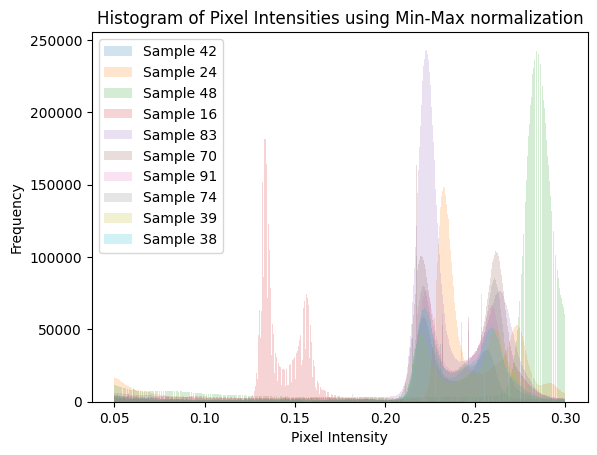

In [16]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
for index in range(len(pixel_values)):
    ax.hist(normalized_pixel_values[index], bins=1000, range=(0.05, 0.3), alpha=0.2, label=f'Sample {random_elements[index]}', color=f'C{index}')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities using Min-Max normalization')

# Add legend
ax.legend()

# Show the plot
plt.show()

##### Standardization of the Batch

`normalized_value = (original_value - mean_value) / (std_value)`

In [17]:
concat = np.concatenate(pixel_values)
mean = np.mean(concat)
std = np.std(concat)

In [18]:
mean, std

(-776.3059947447707, 401.54632193828064)

In [19]:
normalized_pixel_values = []

for i in range(len(pixel_values)):
    array = pixel_values[i]

    # Calculate the min and max values
    min_value = np.min(array)
    max_value = np.max(array)

    new_array = (array - mean) / (std)

    normalized_pixel_values.append(new_array)

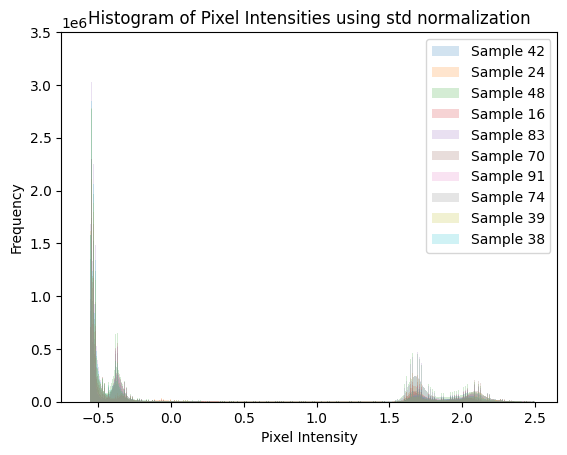

In [29]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for each index in pixel_values with different colors
for index in range(len(normalized_pixel_values)):
    ax.hist(normalized_pixel_values[index], bins=1000, range=(-0.6, 2.5), alpha=0.2, label=f'Sample {random_elements[index]}', color=f'C{index}')

# Set labels and title
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities using std normalization')

ax.set_ylim(0, 3.5e6)

# Add legend
ax.legend()

# Show the plot
plt.show()

[-0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0.55708144
 -0.55708144 -0.55708144 -0.55708144 -0.55708144 -0

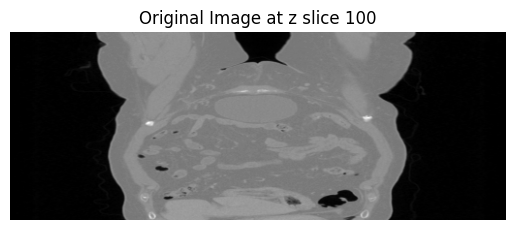

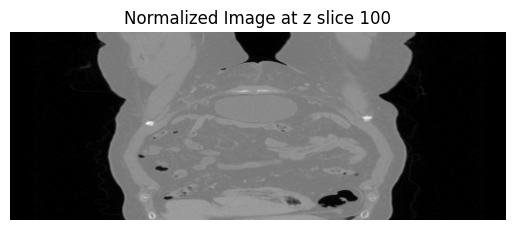

: 

In [32]:
# Hone in on example 024 for consistency

random_example_x = os.path.join(data_path, 'nnUNet_raw', id_anorectum, 'imagesTr',f'zzAMLART_024_0000{data["file_ending"]}')

# Read the file using SimpleITK
image_x = sitk.ReadImage(random_example_x)
array_x = sitk.GetArrayFromImage(image_x)

# Select the z slice
z_slice = 100

# Normalize the image
array_x_norm = (array_x - mean) / (std)

print(array_x_norm[0,0])

# Plot the image
plt.imshow(array_x[:, 210, :], cmap='gray')
plt.axis('off')
plt.title(f'Original Image at z slice {z_slice}')
plt.show()

# Plot the image
plt.imshow(array_x_norm[:, 210, :], cmap='gray')
plt.axis('off')
plt.title(f'Normalized Image at z slice {z_slice}')
plt.show()

# Followup meeting

Turns out, that CT scans are in the Hounsfield scale: https://en.wikipedia.org/wiki/Hounsfield_scale which means that each pixel encodes the information about the type of tissue it is scanning and therefore is uniform amongst other scans. It is a measure of radiodensity.

Furthermore, these values are quasi-normalized. 